In [1]:
%matplotlib inline
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Model.model import Model
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

In [2]:
batch_size = 5000
z_dim = 2
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False) 
data = mnist.test.images[0:batch_size]
labels = mnist.test.labels[0:batch_size]
input_dim = np.shape(data)[1]
path = os.getcwd() + '/Save_' + str(z_dim)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Plot loss

In [3]:
record_rec = np.load(path + '/record_rec.npy')
record_gen = np.load(path + '/record_gen.npy')
record_disc = np.load(path + '/record_disc.npy')

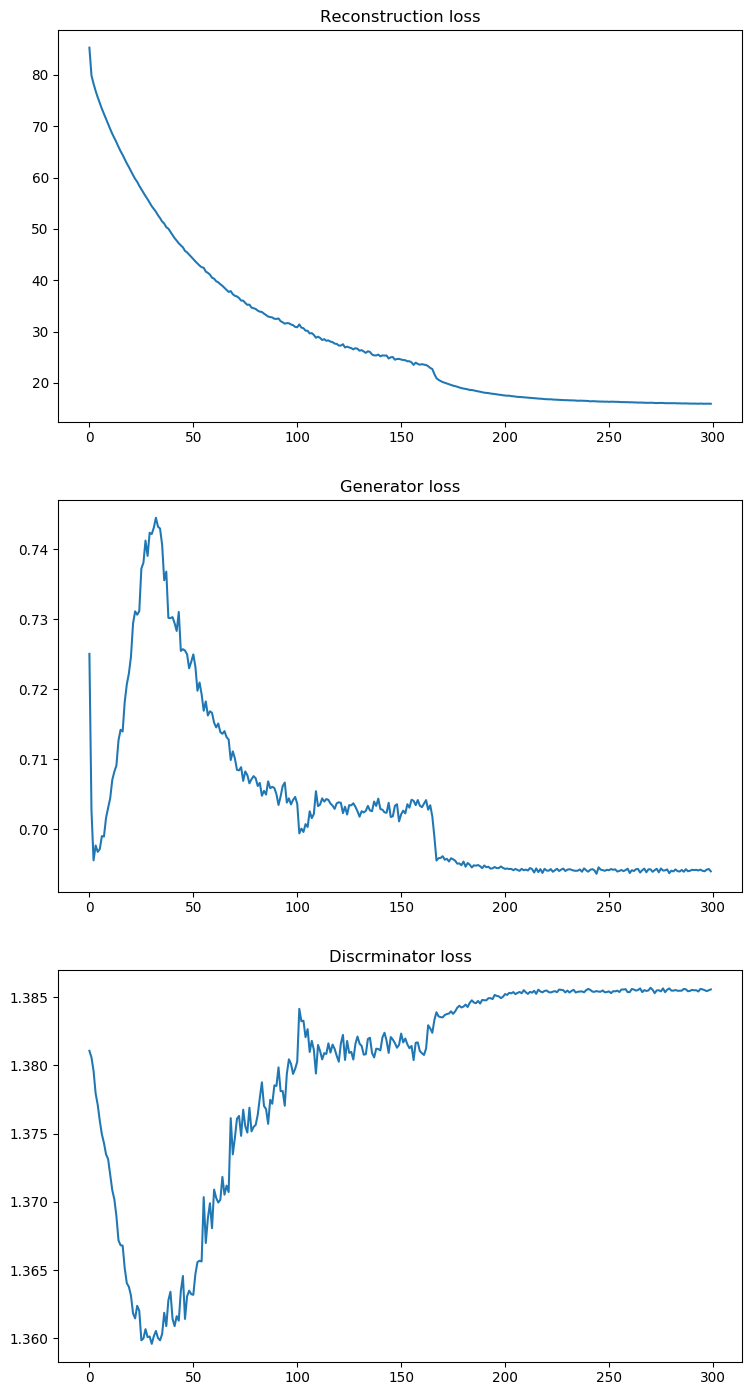

In [4]:
plt.figure(figsize=(9, 18),dpi=98)

p1 = plt.subplot(311)
p1.plot(record_rec)
p1.set_title('Reconstruction loss')

p2 = plt.subplot(312)
p2.plot(record_gen)
p2.set_title('Generator loss')

p3 = plt.subplot(313)
p3.plot(record_disc)
p3.set_title('Discrminator loss')

# Use test data to test model 

In [5]:
model = Model(input_dim, z_dim)
model.set_model()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, path + "/model.ckpt")
print("Model restored")

INFO:tensorflow:Restoring parameters from /home/kt/Adversarial-Autoencoder/Save_2/model.ckpt
Model restored


In [6]:
z = model.encoding(sess, data)
unique, counts = np.unique(labels, return_counts=True)
print np.asarray((unique, counts)).T

[[  0 460]
 [  1 571]
 [  2 530]
 [  3 500]
 [  4 500]
 [  5 456]
 [  6 462]
 [  7 512]
 [  8 489]
 [  9 520]]


In [7]:
unique, counts = np.unique(labels, return_counts=True)
counts

array([460, 571, 530, 500, 500, 456, 462, 512, 489, 520])

In [8]:
if z_dim > 2:
    tsne = TSNE(n_components=2, random_state=0)
    t_z = tsne.fit_transform(z)
else:
    t_z = z

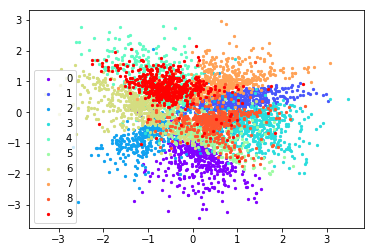

In [9]:
colors = cm.rainbow(np.linspace(0, 1, 10))
scatter = []
index = xrange(10)
for i in range(10):
    tmp = np.where(labels == i)
    scatter.append(plt.scatter(t_z[tmp, 0], t_z[tmp, 1], c = colors[i] ,s = 5))

plt.legend(scatter, index)
plt.savefig('Result/mnist_test_' + str(z_dim) + '.png')
plt.show()


In [10]:
data = model.decoding(sess, z)

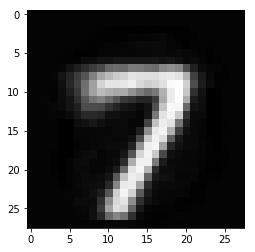

In [11]:
tmp = np.reshape(data[0], (28, 28))
plt.imshow(tmp, cmap='gray')

In [12]:
sess.close()